## Github là gì?
- Platform dành cho các nhóm dev
- Nơi lưu trữ code (Public, Private)
- Github Copilot (X)
- Source code control
- Tự động CI/CD
- Hỗ trợ nhiều package manager
- Hỗ trợ nhiều ngôn ngữ lập trình, các công nghệ khác nhau

## Github Action là gì?
- Tùy thuộc vào sự kiện
- Nó nói tới toàn bộ platform và ecosystem để tạo và chạy các workflow trong môi trường Github
- Mỗi action là một script trong workflow

## Workflow là gì?
- Một script tự động (action) chạy khi có sự kiện xảy ra trong một repo
- Một cách hiệu quả để tự động phát triển, kiểm thử, build, deploy, ...
- Common use:
    - CI/CD
    - Code quality
    - Security
    - Automation
    - ...

## Github workflow event type

- Push events (`push`): Khi có commit mới được push lên repo
- Pull request events (`pull_request`): Khi có pull request mới được tạo
- Issue events (`issues`): Khi có issue mới được tạo
- Release events (`release`): Khi có release mới được tạo
- Schedule events (`schedule`): Khi đến thời gian được schedule
- Workflow events (`workflow`): Khi có workflow mới được run
- ...

## Kích hoạt workflow khi commit code
- Workflow chạy khi có sự kiện push tới một nhánh cụ thể hoặc repo
- Use cases:
    - Kiểm thử
    - Build
    - Deploy
    - ...

VD:
```yaml
on:
    push:
        branches:
        - main
    ```

## Schedule-based workflow
- Workflow chạy tự động tại một thời điểm cụ thể hoặc theo chu kỳ
- Use cases:
    - Backup
    - Clean up
    - ...

VD:
```yaml
on:
    schedule:
        - cron: '0 0 * * *' # Chạy mỗi ngày lúc 0h
    ```

## Điều chỉnh workflow cho manual events

- Workflow chỉ chạy khi được kích hoạt bởi một sự kiện do người dùng tạo ra
- Use cases:
    - Deploy
    - Release
    - ...

VD:
```yaml
on:
    workflow_dispatch:
    ```

## Điều chỉnh workflow cho webhook events

- Workflow chạy khi có webhook event từ một service khác
- Use cases:
    - Slack notification
    - Jira integration
    - ...

VD:
```yaml
on:
    repository_dispatch:
        types: [my-event-type]
    ```

## Mô tả một Github event để kích hoạt workflow dựa trên sự kiện

- Giả sử: Tự động deploy một website tới Netlify mỗi lần có commit mới được push lên nhánh main
- Thực hiện: Push một workflow mới tới Github repo; bất cứ khi nào user đẩy commit mới lên nhánh main, workflow sẽ tự động deploy website tới Netlify

```yaml
name: Deploy to Netlify
on:
    push:
        branches: [ main ]

jobs:
    deploy:
        runs-on: ubuntu-latest

        steps:
            - uses: actions/checkout@v2
            - name: Install dependencies
              run: npm install
            - name: Build website
              run: npm run build
            - name: Deploy to Netlify
              uses: netlify/actions/cli@master
              with:
                site_id: your-netlify-site-id
                api_key: your-netlify-api-key
                args: deploy --prod
```

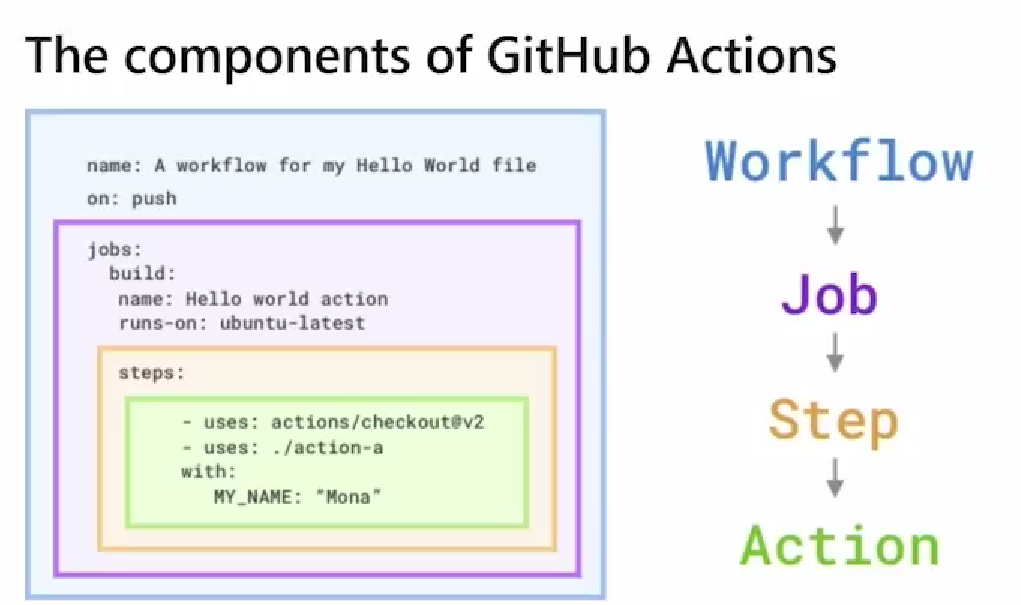